<a href="https://colab.research.google.com/github/Bocampagni/Applied-mathematics/blob/master/clustering/poverty_mpi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying mathematical analyses in order to make a MPI.

Fábio Alves Bocampagni,
David Rodrigues Albuquerque


What is the Multidimensional Poverty Measure? An index that captures the percentage of households in a country deprived along three dimensions of well-being – monetary poverty, education, and basic infrastructure services – to provide a more complete picture of poverty.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("/content/base_amostra_pessoa_201812.csv")

#Creating a sampling sub group, to gather only information that will be used.

cad_unico = data[['id_familia', 'id_pessoa',
                  'cod_sexo_pessoa',
                  'idade',
                  'cod_raca_cor_pessoa',
                  'cod_deficiencia_memb',
                  'cod_sabe_ler_escrever_memb',
                  'cod_curso_frequentou_pessoa_memb',
                  'val_renda_bruta_12_meses_memb',
                  'cod_principal_trab_memb',
                  'val_remuner_emprego_memb',
                  'classf',
                  ]].copy()

#Avoiding null values in important fields
cad_unico = cad_unico.dropna(how='any',axis=0) 

cad_unico


,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_raca_cor_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,cod_curso_frequentou_pessoa_memb,val_renda_bruta_12_meses_memb,cod_principal_trab_memb,val_remuner_emprego_memb,classf
0,1555504.0,1.0,2,44,1.0,2,1.0,4.0,3840.0,1.0,320.0,3
6,4963019.0,7.0,2,35,4.0,2,1.0,5.0,12564.0,4.0,1047.0,1
7,3407990.0,8.0,2,27,2.0,2,1.0,5.0,2400.0,1.0,200.0,2
15,69894.0,16.0,2,17,1.0,2,1.0,5.0,1920.0,1.0,160.0,2
21,2565641.0,22.0,2,36,1.0,2,1.0,4.0,15600.0,4.0,1300.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1048551,2353117.0,1048552.0,1,30,2.0,2,1.0,8.0,4800.0,1.0,400.0,3
1048553,965404.0,1048554.0,1,41,1.0,2,1.0,5.0,6000.0,1.0,500.0,3
1048560,268166.0,1048561.0,1,29,4.0,2,1.0,4.0,17052.0,4.0,1421.0,2
1048564,4345055.0,1048565.0,2,45,1.0,1,1.0,8.0,6080.0,1.0,760.0,1


# Money as a vector of wealth

After the data cleaning, we can finally dive into the analyses itself. Let us first understand the sampling financial information, in other words, the amount of money per person. 


In [ ]:
cad_unico['val_renda_bruta_12_meses_memb'].max()

99990.0

As we can see, if we **only** look at the amount money received in the span of a year, the highest record in the sampling would be considered a wealthy person if compared to the mean of its country (R$ 30.840).

We can not say otherwise (the lowest entry is a poor person), due to the fact that there are people in the sampling that are underage or retired, therefore, they have no jobs or the money they have comes from different resources, like donating or retirement.

In fact, in order to ensure that the sampling do not have distant values, we can calculate the standard deviation of it, in order to analyse how much the values differ from its mean.

Let us first see what is the mean of what people receive

In [ ]:
int(cad_unico['val_renda_bruta_12_meses_memb'].mean())


5178

Then, we calculate the standard deviation

In [ ]:
int(cad_unico['val_renda_bruta_12_meses_memb'].std())

5660

As we can see, the values are not that far from eachother. Over the period of a year, this would represent a monthly gap of R$ 462, on average.

# Education as a vector of wealth

We can stablish a correlation between a well educated person with the amount of money it receveis.

### Correlation between literate and illiterate people

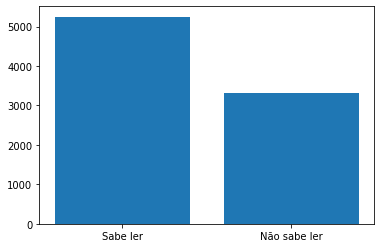

In [ ]:

#Creating a subset gathered by the either the person can read
reading_capacity_group = cad_unico[['cod_sabe_ler_escrever_memb','val_renda_bruta_12_meses_memb']].groupby('cod_sabe_ler_escrever_memb')

groups = [reading_capacity_group.get_group(x) for x in reading_capacity_group.groups]

#Taking the mean salary based on the previous subset 
can_read_salary_mean = groups[0]['val_renda_bruta_12_meses_memb'].mean()
cannot_read_salary_mean = groups[1]['val_renda_bruta_12_meses_memb'].mean()

# Plotting the correlation
means = [can_read_salary_mean, cannot_read_salary_mean]
groups = ('Sabe ler', 'Não sabe ler')
y_pos = np.arange(len(groups))
plt.bar(y_pos, means)
plt.xticks(y_pos, groups)
plt.show()

As we can see, the people who have the ability to read receive a greater amount of money per year.

### Correlation between level of schooling

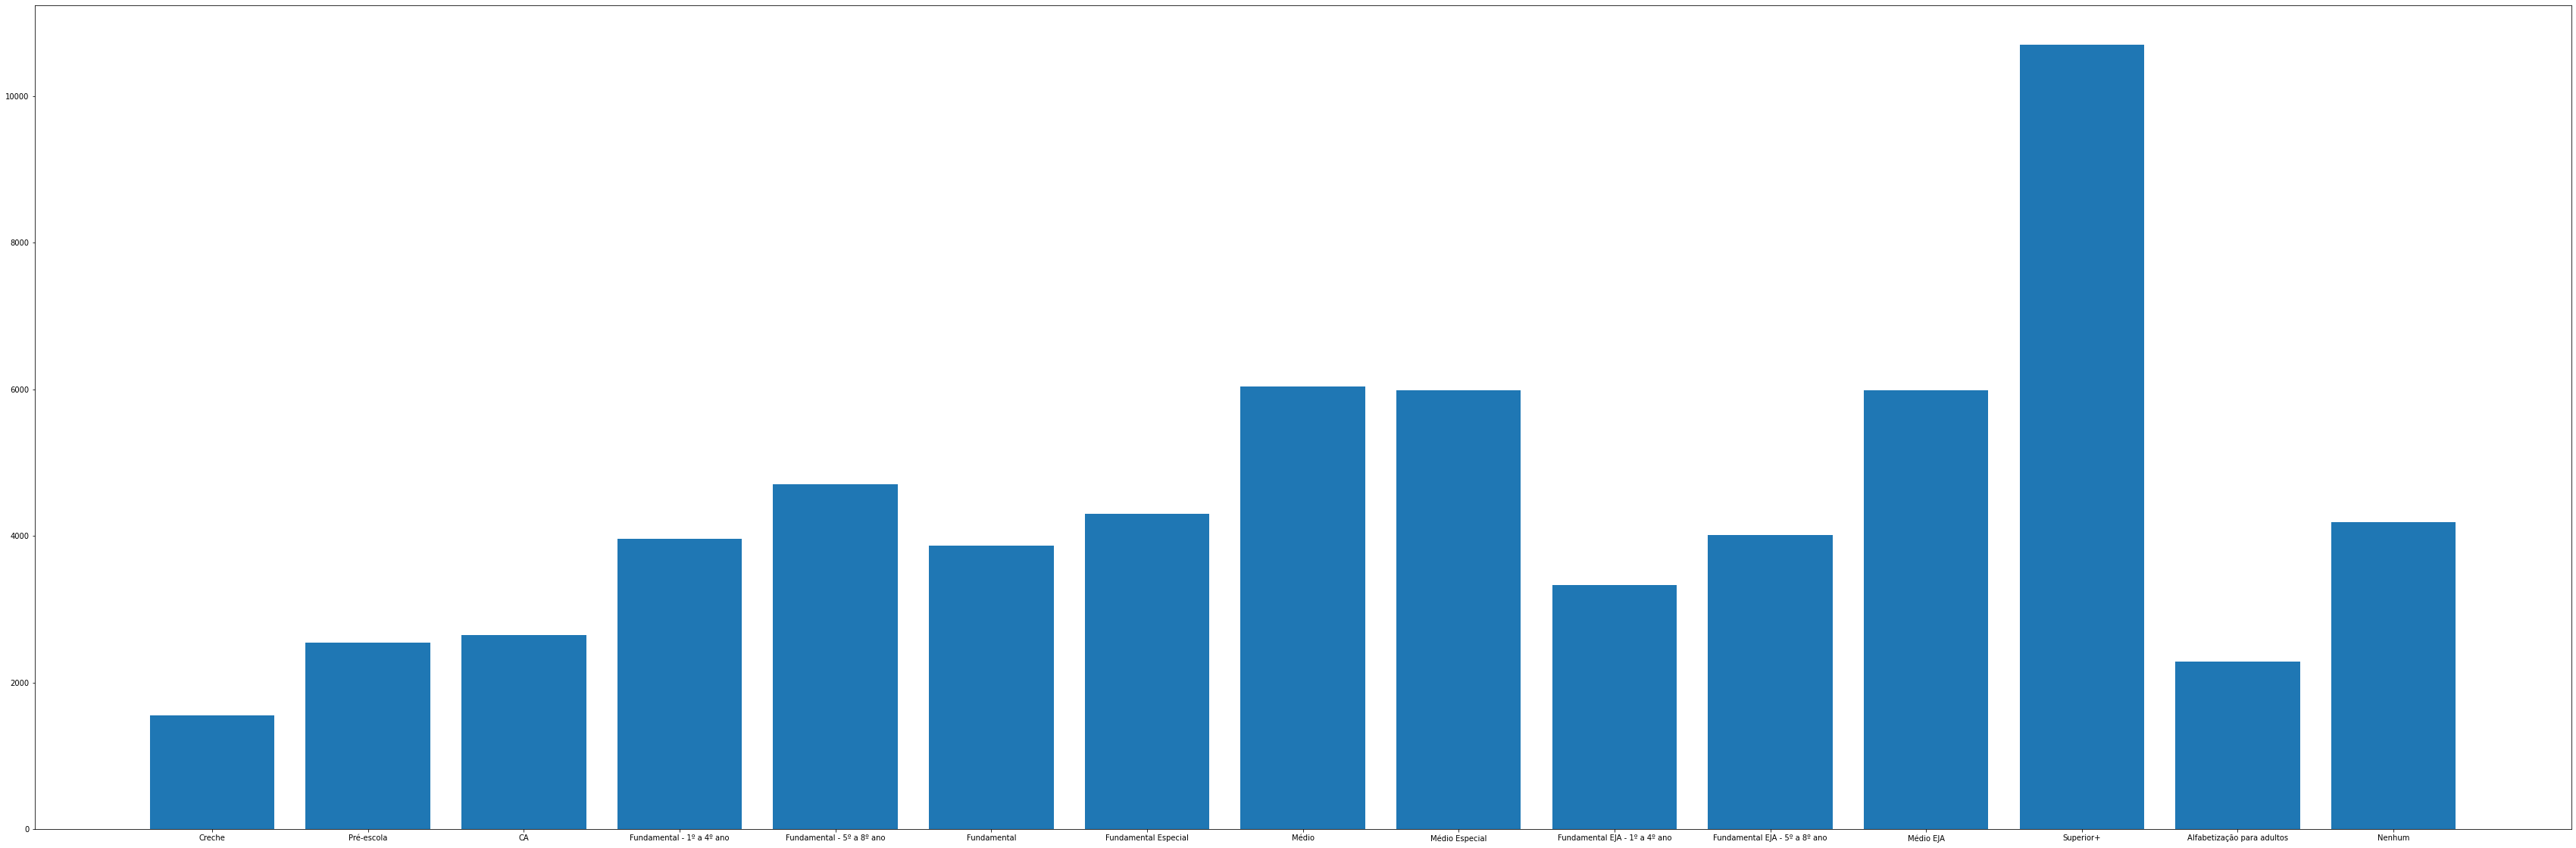

In [ ]:
#Creating a subset grouped by people school leveling
schooling_group = cad_unico[['cod_curso_frequentou_pessoa_memb','val_renda_bruta_12_meses_memb']].groupby('cod_curso_frequentou_pessoa_memb')

groups = [schooling_group.get_group(x) for x in schooling_group.groups]

# #Taking the mean salary based on the previous subset 
school_leveling_group_1 = groups[0]['val_renda_bruta_12_meses_memb'].mean()
school_leveling_group_2 = groups[1]['val_renda_bruta_12_meses_memb'].mean()
school_leveling_group_3 = groups[2]['val_renda_bruta_12_meses_memb'].mean()
school_leveling_group_4 = groups[3]['val_renda_bruta_12_meses_memb'].mean()
school_leveling_group_5 = groups[4]['val_renda_bruta_12_meses_memb'].mean()
school_leveling_group_6 = groups[5]['val_renda_bruta_12_meses_memb'].mean()
school_leveling_group_7 = groups[6]['val_renda_bruta_12_meses_memb'].mean()
school_leveling_group_8 = groups[7]['val_renda_bruta_12_meses_memb'].mean()
school_leveling_group_9 = groups[8]['val_renda_bruta_12_meses_memb'].mean()
school_leveling_group_10 = groups[9]['val_renda_bruta_12_meses_memb'].mean()
school_leveling_group_11 = groups[10]['val_renda_bruta_12_meses_memb'].mean()
school_leveling_group_12 = groups[11]['val_renda_bruta_12_meses_memb'].mean()
school_leveling_group_13 = groups[12]['val_renda_bruta_12_meses_memb'].mean()
school_leveling_group_14 = groups[13]['val_renda_bruta_12_meses_memb'].mean()
school_leveling_group_15 = groups[14]['val_renda_bruta_12_meses_memb'].mean()

# # Plotting the correlation
means = [school_leveling_group_1, school_leveling_group_2, school_leveling_group_3, school_leveling_group_4,
         school_leveling_group_5, school_leveling_group_6, school_leveling_group_7, school_leveling_group_8,
         school_leveling_group_9, school_leveling_group_10, school_leveling_group_11, school_leveling_group_12,
         school_leveling_group_13, school_leveling_group_14, school_leveling_group_15]
groups = ('Creche', 'Pré-escola','CA', 'Fundamental - 1º a 4º ano','Fundamental - 5º a 8º ano', 'Fundamental','Fundamental Especial', 'Médio','Médio Especial', 'Fundamental EJA - 1º a 4º ano',
'Fundamental EJA - 5º a 8º ano', 'Médio EJA','Superior+', 'Alfabetização para adultos','Nenhum')
y_pos = np.arange(len(groups))

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(60)
f.set_figheight(20)

plt.bar(y_pos, means)
plt.xticks(y_pos, groups)
plt.show()

As we can see, people who have higher level of education are likely to have greater amount of money per year.

# Occupation as a vector of wealth



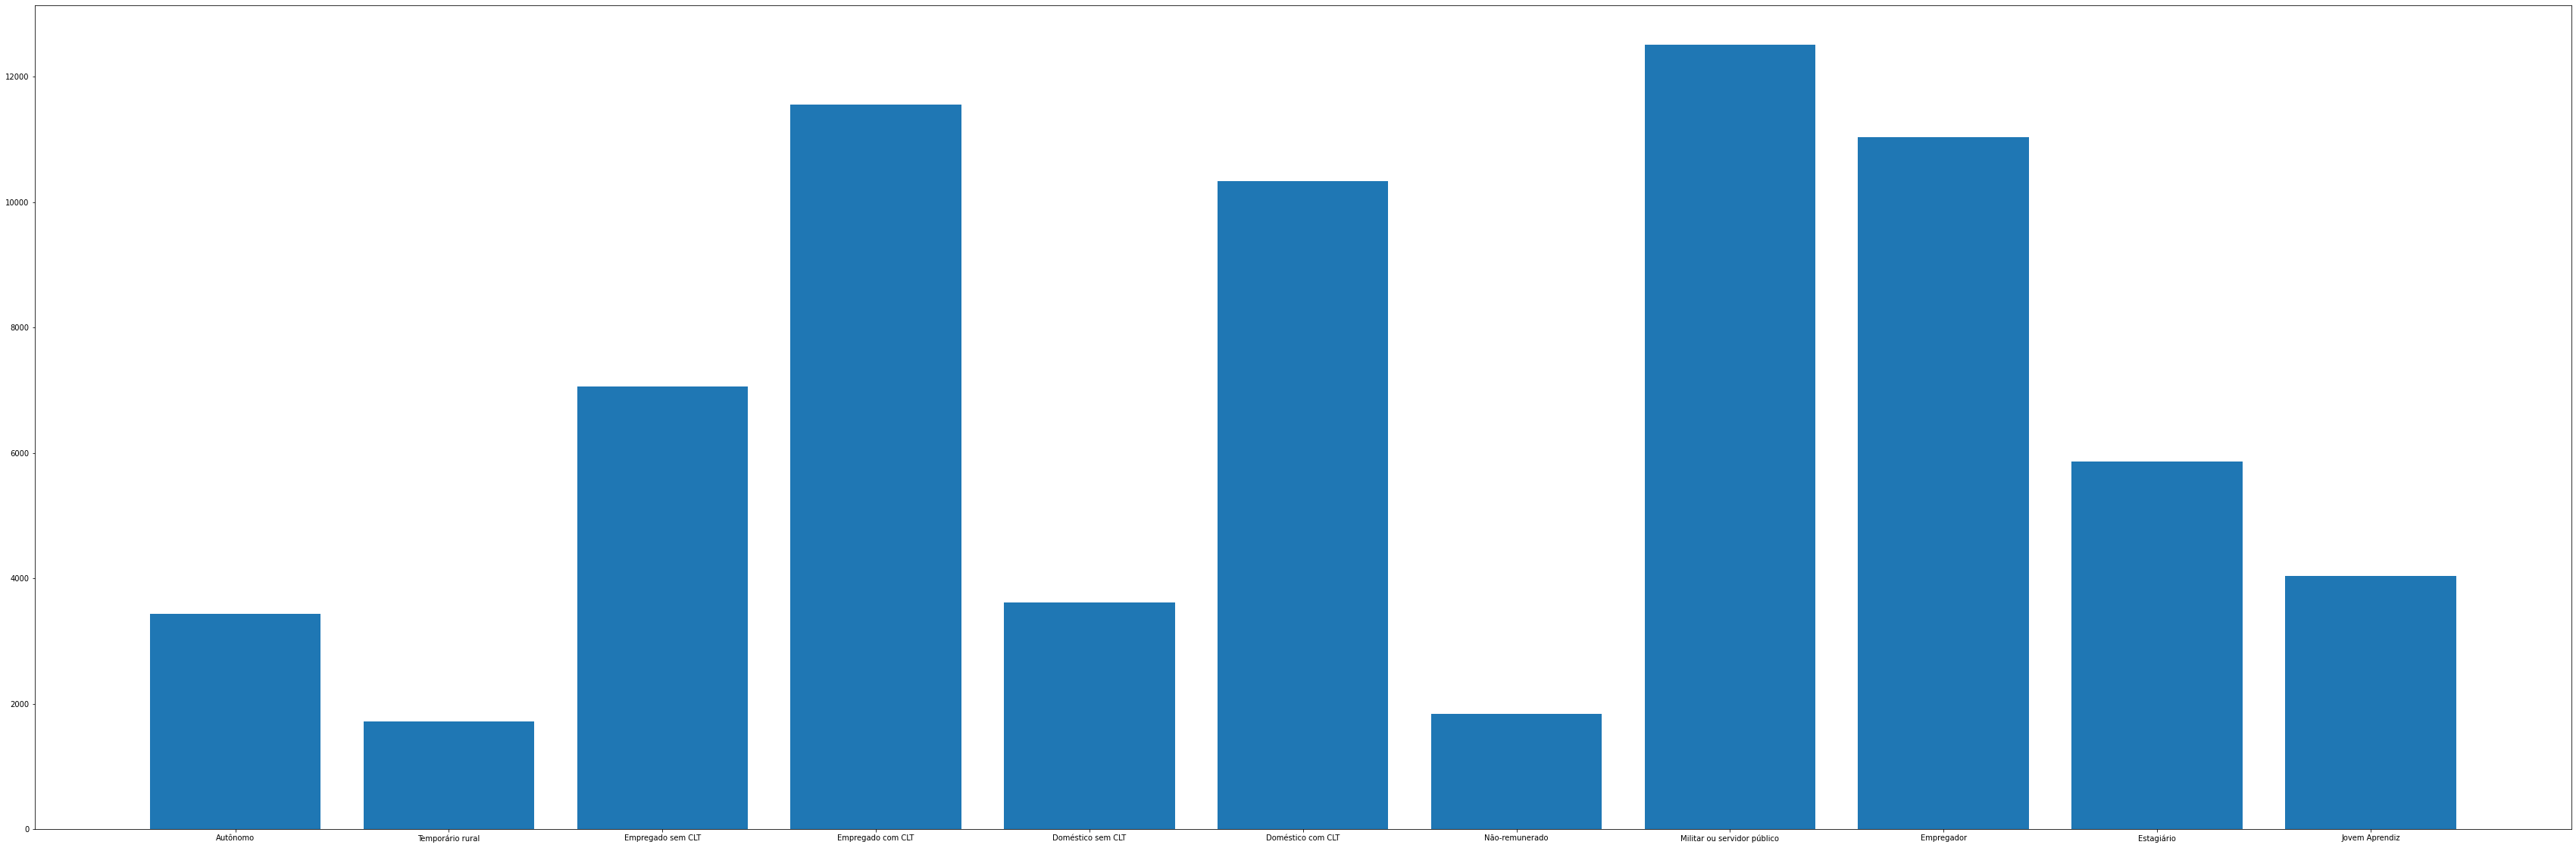

In [ ]:
#Creating a subset grouped by people occupation
occupation_group = cad_unico[['cod_principal_trab_memb','val_renda_bruta_12_meses_memb']].groupby('cod_principal_trab_memb')

groups = [occupation_group.get_group(x) for x in occupation_group.groups]

# #Taking the mean salary based on the previous subset 
occupation_group_1 = groups[0]['val_renda_bruta_12_meses_memb'].mean()
occupation_group_2 = groups[1]['val_renda_bruta_12_meses_memb'].mean()
occupation_group_3 = groups[2]['val_renda_bruta_12_meses_memb'].mean()
occupation_group_4 = groups[3]['val_renda_bruta_12_meses_memb'].mean()
occupation_group_5 = groups[4]['val_renda_bruta_12_meses_memb'].mean()
occupation_group_6 = groups[5]['val_renda_bruta_12_meses_memb'].mean()
occupation_group_7 = groups[6]['val_renda_bruta_12_meses_memb'].mean()
occupation_group_8 = groups[7]['val_renda_bruta_12_meses_memb'].mean()
occupation_group_9 = groups[8]['val_renda_bruta_12_meses_memb'].mean()
occupation_group_10 = groups[9]['val_renda_bruta_12_meses_memb'].mean()
occupation_group_11 = groups[10]['val_renda_bruta_12_meses_memb'].mean()

# # Plotting the correlation
means = [occupation_group_1, occupation_group_2, occupation_group_3, occupation_group_4,
         occupation_group_5, occupation_group_6, occupation_group_7, occupation_group_8,
         occupation_group_9, occupation_group_10, occupation_group_11]
groups = ('Autônomo', 'Temporário rural','Empregado sem CLT', 'Empregado com CLT','Doméstico sem CLT', 'Doméstico com CLT','Não-remunerado', 'Militar ou servidor público','Empregador', 'Estagiário',
'Jovem Aprendiz')
y_pos = np.arange(len(groups))

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(60)
f.set_figheight(20)

plt.bar(y_pos, means)
plt.xticks(y_pos, groups)
plt.show()

As we can see, people engaged in military carriers, public positions and CLT are more likely to have greater amount of money per year.

# Infrastructure as a vector of wealth

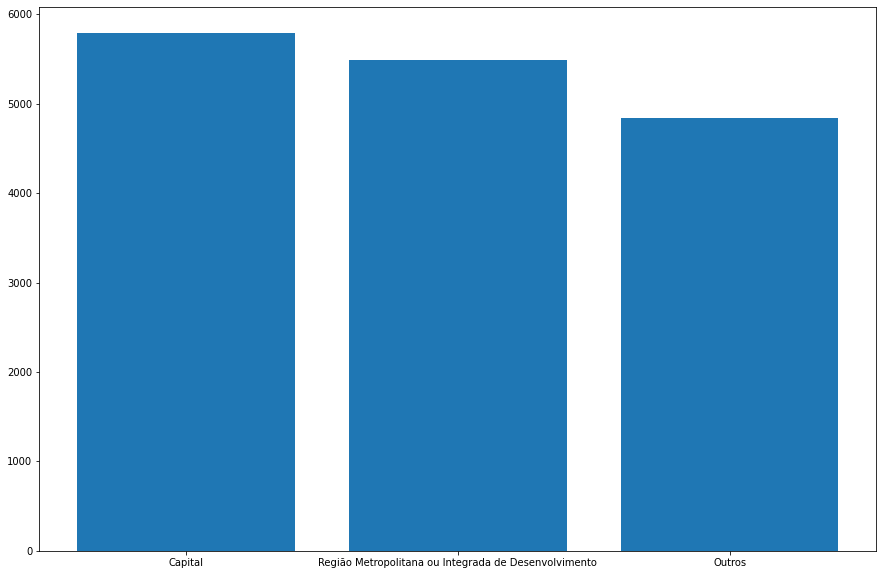

In [ ]:
#Creating a subset grouped by people location
infrastructure_group = cad_unico[['classf','val_renda_bruta_12_meses_memb']].groupby('classf')

groups = [infrastructure_group.get_group(x) for x in infrastructure_group.groups]

# #Taking the mean salary based on the previous subset 
infrastructure_group_1 = groups[0]['val_renda_bruta_12_meses_memb'].mean()
infrastructure_group_2 = groups[1]['val_renda_bruta_12_meses_memb'].mean()
infrastructure_group_3 = groups[2]['val_renda_bruta_12_meses_memb'].mean()

# # Plotting the correlation
means = [infrastructure_group_1, infrastructure_group_2, infrastructure_group_3]
groups = ('Capital', 'Região Metropolitana ou Integrada de Desenvolvimento','Outros')
y_pos = np.arange(len(groups))

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.bar(y_pos, means)
plt.xticks(y_pos, groups)
plt.show()

As we can see, people living/working in the capital are more likely to have greater amount of money per year. Besides that, this metric doesn't take into living cost.

# Race, sex and education as a vector of wealth

In our sampling, we can infer how many people are from a race, in which of it, the sex and the education. 

To simplify, the last case study of this document will be the a correlation between money, race, sex and education. As education get fixed on a single entry, for example, completed high school, we can take people from the same category of job (Under the rules of clt), and check how much people differ from each other under the same aspect of analise. 

But first, let us see how many pleople of our sampling say about its race.

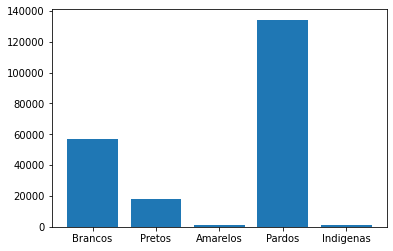

In [ ]:
brancos = len(cad_unico[cad_unico.cod_raca_cor_pessoa == 1])
pretos = len(cad_unico[cad_unico.cod_raca_cor_pessoa == 2])
amarelos = len(cad_unico[cad_unico.cod_raca_cor_pessoa == 3])
pardos =len(cad_unico[cad_unico.cod_raca_cor_pessoa == 4])
indigenas =len(cad_unico[cad_unico.cod_raca_cor_pessoa == 5])

# Plotting the race data
data = [brancos, pretos, amarelos, pardos, indigenas]
groups = ('Brancos', 'Pretos', 'Amarelos','Pardos','Indigenas')
y_pos = np.arange(len(groups))
plt.bar(y_pos, data)
plt.xticks(y_pos, groups)
plt.show()

Now we are going to start the analises only with envy parameters (Not considering the other ones that cleary has a weight on the result.) 

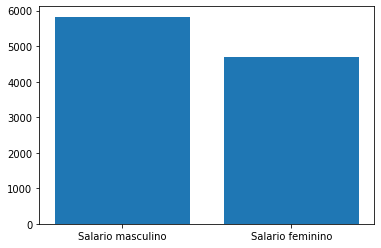

In [ ]:
men_salary = cad_unico[cad_unico.cod_sexo_pessoa == 1]['val_renda_bruta_12_meses_memb'].mean()
women_salary = cad_unico[cad_unico.cod_sexo_pessoa == 2]['val_renda_bruta_12_meses_memb'].mean()

# Plotting the race data
data = [men_salary, women_salary]
groups = ('Salario masculino', 'Salario feminino')
y_pos = np.arange(len(groups))
plt.bar(y_pos, data)
plt.xticks(y_pos, groups)
plt.show()

With this envy analise we can infer that men, on average, receive 20% more than women.

Let us dive into salary x race

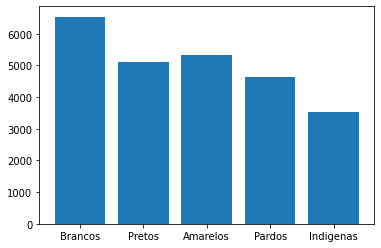

In [ ]:
# Gathering the frames by race

groups = []
for x in range(1,6):
  groups.append(cad_unico[cad_unico.cod_raca_cor_pessoa == x])

salary_per_group = []
for entry in groups:
  salary_per_group.append(entry['val_renda_bruta_12_meses_memb'].mean())

# Plotting the race data
data = salary_per_group
groups = ('Brancos', 'Pretos', 'Amarelos','Pardos','Indigenas')
y_pos = np.arange(len(groups))
plt.bar(y_pos, data)
plt.xticks(y_pos, groups)
plt.show()

Finally, let us make a complete analise. Considering all the variables we have in the sampling in order to make a smarter study of poverty.

<ipython-input-21-fefbc0ba94fe>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  only_high_school_and_clt = cad_unico[cad_unico.cod_curso_frequentou_pessoa_memb == 8][cad_unico.cod_principal_trab_memb == 4]


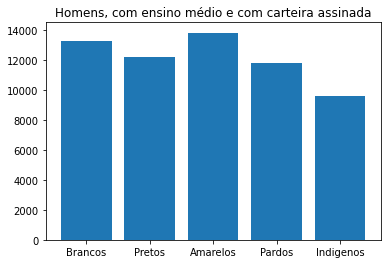

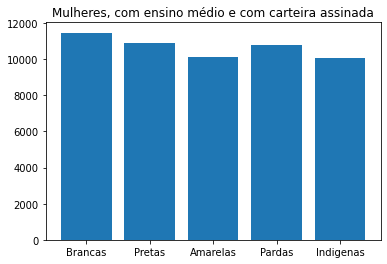

In [ ]:
only_high_school_and_clt = cad_unico[cad_unico.cod_curso_frequentou_pessoa_memb == 8][cad_unico.cod_principal_trab_memb == 4]

men = only_high_school_and_clt[only_high_school_and_clt.cod_sexo_pessoa == 1]
women = only_high_school_and_clt[only_high_school_and_clt.cod_sexo_pessoa == 2]

groups = []
for x in range(1,6):
  groups.append(men[men.cod_raca_cor_pessoa == x])

men_salary_per_group = []
for entry in groups:
  men_salary_per_group.append(entry['val_renda_bruta_12_meses_memb'].mean())

groups = []
for x in range(1,6):
  groups.append(women[women.cod_raca_cor_pessoa == x])

women_salary_per_group = []
for entry in groups:
  women_salary_per_group.append(entry['val_renda_bruta_12_meses_memb'].mean())


# Plotting the race data
data = men_salary_per_group
groups = ('Brancos', 'Pretos', 'Amarelos','Pardos','Indigenos')
y_pos = np.arange(len(groups))
plt.title("Homens, com ensino médio e com carteira assinada")
plt.bar(y_pos, data)
plt.xticks(y_pos, groups)
plt.show()

# Plotting the race data
data = women_salary_per_group
groups = ('Brancas', 'Pretas', 'Amarelas','Pardas','Indigenas')
y_pos = np.arange(len(groups))
plt.title("Mulheres, com ensino médio e com carteira assinada")
plt.bar(y_pos, data)
plt.xticks(y_pos, groups)
plt.show()
